
# ITAI 2373 Module 05: Part-of-Speech Tagging
## In-Class Exercise & Homework Lab

Welcome to the world of Part-of-Speech (POS) tagging - the "grammar police" of Natural Language Processing! 🚔📝

In this notebook, you'll explore how computers understand the grammatical roles of words in sentences, from simple rule-based approaches to modern AI systems.

### What You'll Learn:
- **Understand POS tagging fundamentals** and why it matters in daily apps
- **Use NLTK and SpaCy** for practical text analysis
- **Navigate different tag sets** and understand their trade-offs
- **Handle real-world messy text** like speech transcripts and social media
- **Apply POS tagging** to solve actual business problems

### Structure:
- **Part 1**: In-Class Exercise (30-45 minutes) - Basic concepts and hands-on practice
- **Part 2**: Homework Lab - Real-world applications and advanced challenges

---

*💡 **Pro Tip**: POS tagging is everywhere! It helps search engines understand "Apple stock" vs "apple pie", helps Siri understand your commands, and powers autocorrect on your phone.*



## 🛠️ Setup and Installation

Let's get our tools ready! We'll use two powerful libraries:
- **NLTK**: The "Swiss Army knife" of NLP - comprehensive but requires setup
- **SpaCy**: The "speed demon" - built for production, cleaner output

Run the cells below to install and set up everything we need.


In [1]:

# Install required libraries (run this first!)
!pip install nltk spacy matplotlib seaborn pandas
!python -m spacy download en_core_web_sm

print("✅ Installation complete!")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 94.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
✅ Installation complete!


In [2]:

# Import all the libraries we'll need
import nltk
import spacy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Download NLTK data (this might take a moment)
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('universal_tagset')

# Load SpaCy model
nlp = spacy.load('en_core_web_sm')

print("🎉 All libraries loaded successfully!")
print("📚 NLTK version:", nltk.__version__)
print("🚀 SpaCy version:", spacy.__version__)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.


🎉 All libraries loaded successfully!
📚 NLTK version: 3.9.1
🚀 SpaCy version: 3.8.7



---
# 🎯 PART 1: IN-CLASS EXERCISE (30-45 minutes)

Welcome to the hands-on portion! We'll start with the basics and build up your understanding step by step.

## Learning Goals for Part 1:
1. Understand what POS tagging does
2. Use NLTK and SpaCy for basic tagging
3. Interpret and compare different tag outputs
4. Explore word ambiguity with real examples
5. Compare different tagging approaches



## 🔍 Activity 1: Your First POS Tags (10 minutes)

Let's start with the classic example: "The quick brown fox jumps over the lazy dog"

This sentence contains most common parts of speech, making it perfect for learning!


In [6]:
# Let's start with a classic example
sentence = "The quick brown fox jumps over the lazy dog"

# Download punkt_tab if missing
nltk.download('punkt_tab', quiet=True)
# Download averaged_perceptron_tagger_eng if missing
nltk.download('averaged_perceptron_tagger_eng', quiet=True)


# TODO: Use NLTK to tokenize and tag the sentence
# Hint: Use nltk.word_tokenize() and nltk.pos_tag()
tokens = nltk.word_tokenize(sentence)
pos_tags = nltk.pos_tag(tokens)

print("Original sentence:", sentence)
print("\nTokens:", tokens)
print("\nPOS Tags:")
for word, tag in pos_tags:
    print(f"  {word:8} -> {tag}")

Original sentence: The quick brown fox jumps over the lazy dog

Tokens: ['The', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog']

POS Tags:
  The      -> DT
  quick    -> JJ
  brown    -> NN
  fox      -> NN
  jumps    -> VBZ
  over     -> IN
  the      -> DT
  lazy     -> JJ
  dog      -> NN



### 🤔 Quick Questions:
1. What does 'DT' mean? What about 'JJ'? DT seems to classify only words like 'the' while JJ is more from the looks of it to classify adjectives like shown, such as quick.
2. Why do you think 'brown' and 'lazy' have the same tag? In my output it seems that they do not have the same tag but if it did id assume it would be JJ as brown is also considered an adjective.
3. Can you guess what 'VBZ' represents? VBZ more than likely means it classifies Verbs.

*Hint: Think about the grammatical role each word plays in the sentence!*



## 🚀 Activity 2: SpaCy vs NLTK Showdown (10 minutes)

Now let's see how SpaCy handles the same sentence. SpaCy uses cleaner, more intuitive tag names.


In [8]:
# TODO: Process the same sentence with SpaCy
# Hint: Use nlp(sentence) and access .text and .pos_ attributes
doc = nlp(sentence)

print("SpaCy POS Tags:")
for token in doc:
    print(f"  {token.text:8} -> {token.pos_:6} ({token.tag_})")

print("\n" + "="*50)
print("COMPARISON:")
print("="*50)

# Let's compare side by side
nltk_tags = nltk.pos_tag(nltk.word_tokenize(sentence))
spacy_doc = nlp(sentence)

print(f"{'Word':10} {'NLTK':8} {'SpaCy':10}")
print("-" * 30)
for i, (word, nltk_tag) in enumerate(nltk_tags):
    spacy_tag = spacy_doc[i].pos_
    print(f"{word:10} {nltk_tag:8} {spacy_tag:10}")

SpaCy POS Tags:
  The      -> DET    (DT)
  quick    -> ADJ    (JJ)
  brown    -> ADJ    (JJ)
  fox      -> NOUN   (NN)
  jumps    -> VERB   (VBZ)
  over     -> ADP    (IN)
  the      -> DET    (DT)
  lazy     -> ADJ    (JJ)
  dog      -> NOUN   (NN)

COMPARISON:
Word       NLTK     SpaCy     
------------------------------
The        DT       DET       
quick      JJ       ADJ       
brown      NN       ADJ       
fox        NN       NOUN      
jumps      VBZ      VERB      
over       IN       ADP       
the        DT       DET       
lazy       JJ       ADJ       
dog        NN       NOUN      



### 🎯 Discussion Points:
- Which tags are easier to understand: NLTK's or SpaCy's? It is much easier to understand SpaCy's as it directly tells me what each tag is such as "noun" or "adjective"
Do you notice any differences in how they tag the same words? Yes, they provide more insight. Instead of quickly just tagging it as JJ, they tag it as ADJ, which makes more sense as ADJ clearly means Adjective, while JJ can be a little more confusing at first.
- Which system would you prefer for a beginner? Why? I would prefer SpaCy more for a beginner as it is more detailed as to what each tag means making it easier to understand what is going on.



## 🎭 Activity 3: The Ambiguity Challenge (15 minutes)

Here's where things get interesting! Many words can be different parts of speech depending on context. Let's explore this with some tricky examples.


In [13]:

# Ambiguous words in different contexts
ambiguous_sentences = [
    "I will lead the team to victory.",           # lead = verb
    "The lead pipe is heavy.",                    # lead = noun (metal)
    "She took the lead in the race.",            # lead = noun (position)
    "The bank approved my loan.",                # bank = noun (financial)
    "We sat by the river bank.",                 # bank = noun (shore)
    "I bank with Chase.",
    "Can you spot me ten dollars.",
    "What spot do you want to take.",]          # bank = verb

                                                #spot = verb (to lend)
                                                #spot = noun (location)
print("🎭 AMBIGUITY EXPLORATION")
print("=" * 40)

for sentence in ambiguous_sentences:
    print(f"\nSentence: {sentence}")

    # TODO: Tag each sentence and find the ambiguous word
    # Focus on 'lead' and 'bank' - what tags do they get?
    tokens = nltk.word_tokenize(sentence)
    tags = nltk.pos_tag(tokens)

    # Find and highlight the key word
    for word, tag in tags:
        if word.lower() in ['lead', 'bank', 'spot']:
            print(f"  🎯 '{word}' is tagged as: {tag}")


🎭 AMBIGUITY EXPLORATION

Sentence: I will lead the team to victory.
  🎯 'lead' is tagged as: VB

Sentence: The lead pipe is heavy.
  🎯 'lead' is tagged as: NN

Sentence: She took the lead in the race.
  🎯 'lead' is tagged as: NN

Sentence: The bank approved my loan.
  🎯 'bank' is tagged as: NN

Sentence: We sat by the river bank.
  🎯 'bank' is tagged as: NN

Sentence: I bank with Chase.
  🎯 'bank' is tagged as: NN

Sentence: Can you spot me ten dollars.
  🎯 'spot' is tagged as: VB

Sentence: What spot do you want to take.
  🎯 'spot' is tagged as: NN



### 🧠 Think About It:
1. How does the computer know the difference between "lead" (metal) and "lead" (guide)? I would say a big factor that has to do with that is context throughout the sentence.
2. What clues in the sentence help determine the correct part of speech? The word "will" before the word "lead" would insinuate a verb, correcting the part of speech.
3. Can you think of other words that change meaning based on context? Yes i thought of the word 'spot' as shown in my code.

**Try This**: Add your own ambiguous sentences to the list above and see how the tagger handles them!



## 📊 Activity 4: Tag Set Showdown (10 minutes)

NLTK can use different tag sets. Let's compare the detailed Penn Treebank tags (~45 tags) with the simpler Universal Dependencies tags (~17 tags).


In [17]:
# Compare different tag sets
test_sentence = "The brilliant students quickly solved the challenging programming assignment."

# TODO: Get tags using both Penn Treebank and Universal tagsets
# Hint: Use tagset='universal' parameter for universal tags
penn_tags = nltk.pos_tag(nltk.word_tokenize(test_sentence))
universal_tags = nltk.pos_tag(nltk.word_tokenize(test_sentence), tagset='universal')

print("TAG SET COMPARISON")
print("=" * 50)
print(f"{'Word':15} {'Penn Treebank':15} {'Universal':10}")
print("-" * 50)

# TODO: Print comparison table
# Hint: Zip the two tag lists together
for (word, penn_tag), (word, univ_tag) in zip(penn_tags, universal_tags):
    print(f"{word:15} {penn_tag:15} {univ_tag:10}")

# Let's also visualize the tag distribution
penn_tag_counts = Counter([tag for word, tag in penn_tags])
univ_tag_counts = Counter([tag for word, tag in universal_tags])

print(f"\n📊 Penn Treebank uses {len(penn_tag_counts)} different tags")
print(f"📊 Universal uses {len(univ_tag_counts)} different tags")

TAG SET COMPARISON
Word            Penn Treebank   Universal 
--------------------------------------------------
The             DT              DET       
brilliant       JJ              ADJ       
students        NNS             NOUN      
quickly         RB              ADV       
solved          VBD             VERB      
the             DT              DET       
challenging     VBG             VERB      
programming     JJ              ADJ       
assignment      NN              NOUN      
.               .               .         

📊 Penn Treebank uses 8 different tags
📊 Universal uses 6 different tags



### 🤔 Reflection Questions:
1. Which tag set is more detailed? Which is simpler? Enter your answer below
Universal is by far more detailed and simpler.
2. When might you want detailed tags vs. simple tags? Enter your answer below
I would want a detailed tag when my whole point is to tag the words correctly but a simple tag when i want to catch errors gramatically quickly.
3. If you were building a search engine, which would you choose? Why? Enter your answer below
If i were building a serch engine i would want to use Universal tags because not only is it simple but also fast giving enough infor to help understand what words would mean in general.
---



---
# 🎓 End of Part 1: In-Class Exercise

Great work! You've learned the fundamentals of POS tagging and gotten hands-on experience with both NLTK and SpaCy.

## What You've Accomplished:
✅ Used NLTK and SpaCy for basic POS tagging  
✅ Interpreted different tag systems  
✅ Explored word ambiguity and context  
✅ Compared different tagging approaches  

## 🏠 Ready for Part 2?
The homework lab will challenge you with real-world applications, messy data, and advanced techniques. You'll analyze customer service transcripts, handle informal language, and benchmark different taggers.

**Take a break, then dive into Part 2 when you're ready!**

---



# 🏠 PART 2: HOMEWORK LAB
## Real-World POS Tagging Challenges

Welcome to the advanced section! Here you'll tackle the messy, complex world of real text data. This is where POS tagging gets interesting (and challenging)!

## Learning Goals for Part 2:
1. Process real-world, messy text data
2. Handle speech transcripts and informal language
3. Analyze customer service scenarios
4. Benchmark and compare different taggers
5. Understand limitations and edge cases

## 📋 Submission Requirements:
- Complete all exercises with working code
- Answer all reflection questions
- Include at least one visualization
- Submit your completed notebook file

---



## 🌍 Lab Exercise 1: Messy Text Challenge (25 minutes)

Real-world text is nothing like textbook examples! Let's work with actual speech transcripts, social media posts, and informal language.


In [19]:
# Real-world messy text samples
messy_texts = [
    # Speech transcript with disfluencies
    "Um, so like, I was gonna say that, uh, the system ain't working right, you know?",

    # Social media style
    "OMG this app is sooo buggy rn 😤 cant even login smh",

    # Customer service transcript
    "Yeah hi um I'm calling because my internet's been down since like yesterday and I've tried unplugging the router thingy but it's still not working",

    # Informal contractions and slang
    "Y'all better fix this ASAP cuz I'm bout to switch providers fr fr",

    # Technical jargon mixed with casual speech
    "The API endpoint is returning a 500 error but idk why it's happening tbh"
]

print("🔍 PROCESSING MESSY TEXT")
print("=" * 60)

# TODO: Process each messy text sample
# 1. Use both NLTK and SpaCy
# 2. Count how many words each tagger fails to recognize properly
# 3. Identify problematic words (slang, contractions, etc.)

for i, text in enumerate(messy_texts, 1):
    print(f"\n📝 Sample {i}: {text}")
    print("-" * 40)

    # NLTK processing
    nltk_tokens = nltk.word_tokenize(text)
    nltk_tags = nltk.pos_tag(nltk_tokens)

    # TODO: SpaCy processing
    spacy_doc = nlp(text)

    # TODO: Find problematic words (tagged as 'X' or unknown)
    problematic_nltk = [word for word, tag in nltk_tags if tag in ['NNP', 'NNPS', 'POS', 'SYM', 'LS', 'FW']] # Using common problematic tags for NLTK
    problematic_spacy = [token.text for token in spacy_doc if token.pos_ == 'X']

    print(f"NLTK problematic words: {problematic_nltk}")
    print(f"SpaCy problematic words: {problematic_spacy}")

    # TODO: Calculate success rate
    nltk_success_rate = (len(nltk_tags) - len(problematic_nltk)) / len(nltk_tags) if len(nltk_tags) > 0 else 0
    spacy_success_rate = (len(spacy_doc) - len(problematic_spacy)) / len(spacy_doc) if len(spacy_doc) > 0 else 0

    print(f"NLTK success rate: {nltk_success_rate:.1%}")
    print(f"SpaCy success rate: {spacy_success_rate:.1%}")

🔍 PROCESSING MESSY TEXT

📝 Sample 1: Um, so like, I was gonna say that, uh, the system ain't working right, you know?
----------------------------------------
NLTK problematic words: ['Um']
SpaCy problematic words: []
NLTK success rate: 95.8%
SpaCy success rate: 100.0%

📝 Sample 2: OMG this app is sooo buggy rn 😤 cant even login smh
----------------------------------------
NLTK problematic words: ['😤']
SpaCy problematic words: []
NLTK success rate: 91.7%
SpaCy success rate: 100.0%

📝 Sample 3: Yeah hi um I'm calling because my internet's been down since like yesterday and I've tried unplugging the router thingy but it's still not working
----------------------------------------
NLTK problematic words: ["'s"]
SpaCy problematic words: []
NLTK success rate: 96.6%
SpaCy success rate: 100.0%

📝 Sample 4: Y'all better fix this ASAP cuz I'm bout to switch providers fr fr
----------------------------------------
NLTK problematic words: ['ASAP']
SpaCy problematic words: []
NLTK success rate: 92


### 🎯 Analysis Questions:
1. Which tagger handles informal language better? I would say SpaCy handles informal language better as it is at a constant 100.00%
2. What types of words cause the most problems? I would say the ones that cost the most problems would be slang words or words such as "um".
3. How might you preprocess text to improve tagging accuracy? I would have to explain slang for the most part, such as smh = shaking my head.
4. What are the implications for real-world applications? I would say things like chat bots would need robust handling of things such as slang or typo.



## 📞 Lab Exercise 2: Customer Service Analysis Case Study (30 minutes)

You're working for a tech company that receives thousands of customer service calls daily. Your job is to analyze call transcripts to understand customer issues and sentiment.

**Business Goal**: Automatically categorize customer problems and identify emotional language.


In [23]:
# Simulated customer service call transcripts
customer_transcripts = [
    {
        'id': 'CALL_001',
        'transcript': "Hi, I'm really frustrated because my account got locked and I can't access my files. I've been trying for hours and nothing works. This is completely unacceptable.",
        'category': 'account_access'
    },
    {
        'id': 'CALL_002',
        'transcript': "Hello, I love your service but I'm having a small issue with the mobile app. It crashes whenever I try to upload photos. Could you please help me fix this?",
        'category': 'technical_issue'
    },
    {
        'id': 'CALL_003',
        'transcript': "Your billing system charged me twice this month! I want a refund immediately. This is ridiculous and I'm considering canceling my subscription.",
        'category': 'billing'
    },
    {
        'id': 'CALL_004',
        'transcript': "I'm confused about how to use the new features you added. The interface changed and I can't find anything. Can someone walk me through it?",
        'category': 'user_guidance'
    }
]

# TODO: Analyze each transcript for:
# 1. Emotional language (adjectives that indicate sentiment)
# 2. Action words (verbs that indicate what customer wants)
# 3. Problem indicators (nouns related to issues)

analysis_results = []

# Define lists of positive and negative sentiment words
positive_sentiment_words = ['love', 'great', 'good', 'happy', 'please']
negative_sentiment_words = ['frustrated', 'unacceptable', 'ridiculous', 'buggy', 'down', 'issue', 'charged', 'canceling', 'confused', 'can\'t']



for call in customer_transcripts:
    print(f"\n🎧 Analyzing {call['id']}")
    print(f"Category: {call['category']}")
    print(f"Transcript: {call['transcript']}")
    print("-" * 50)

    # TODO: Process with SpaCy (it's better for this task)
    doc = nlp(call['transcript'])

    # TODO: Extract different types of words
    emotional_adjectives = [token.text for token in doc if token.pos_ == 'ADJ']
    action_verbs = [token.text for token in doc if token.pos_ == 'VERB']
    problem_nouns = [token.text for token in doc if token.pos_ == 'NOUN' and any(problem in token.text.lower() for problem in ['account', 'files', 'issue', 'app', 'billing', 'system', 'features', 'interface'])]

    # TODO: Calculate sentiment indicators
    positive_words = [token.text.lower() for token in doc if token.text.lower() in positive_sentiment_words]
    negative_words = [token.text.lower() for token in doc if token.text.lower() in negative_sentiment_words]



    result = {
        'call_id': call['id'],
        'category': call['category'],
        'emotional_adjectives': emotional_adjectives,
        'action_verbs': action_verbs,
        'problem_nouns': problem_nouns,
        'sentiment_score': len(positive_words) - len(negative_words)}

    analysis_results.append(result)

    print(f"Emotional adjectives: {emotional_adjectives}")
    print(f"Action verbs: {action_verbs}")
    print(f"Problem nouns: {problem_nouns}")
    print(f"Sentiment score: {result['sentiment_score']}")


🎧 Analyzing CALL_001
Category: account_access
Transcript: Hi, I'm really frustrated because my account got locked and I can't access my files. I've been trying for hours and nothing works. This is completely unacceptable.
--------------------------------------------------
Emotional adjectives: ['frustrated', 'unacceptable']
Action verbs: ['locked', 'access', 'trying', 'works']
Problem nouns: ['account', 'files']
Sentiment score: -2

🎧 Analyzing CALL_002
Category: technical_issue
Transcript: Hello, I love your service but I'm having a small issue with the mobile app. It crashes whenever I try to upload photos. Could you please help me fix this?
--------------------------------------------------
Emotional adjectives: ['small', 'mobile']
Action verbs: ['love', 'having', 'crashes', 'try', 'upload', 'help', 'fix']
Problem nouns: ['issue', 'app']
Sentiment score: 1

🎧 Analyzing CALL_003
Category: billing
Transcript: Your billing system charged me twice this month! I want a refund immediatel

Index(['call_id', 'category', 'emotional_adjectives', 'action_verbs',
       'problem_nouns', 'sentiment_score'],
      dtype='object')


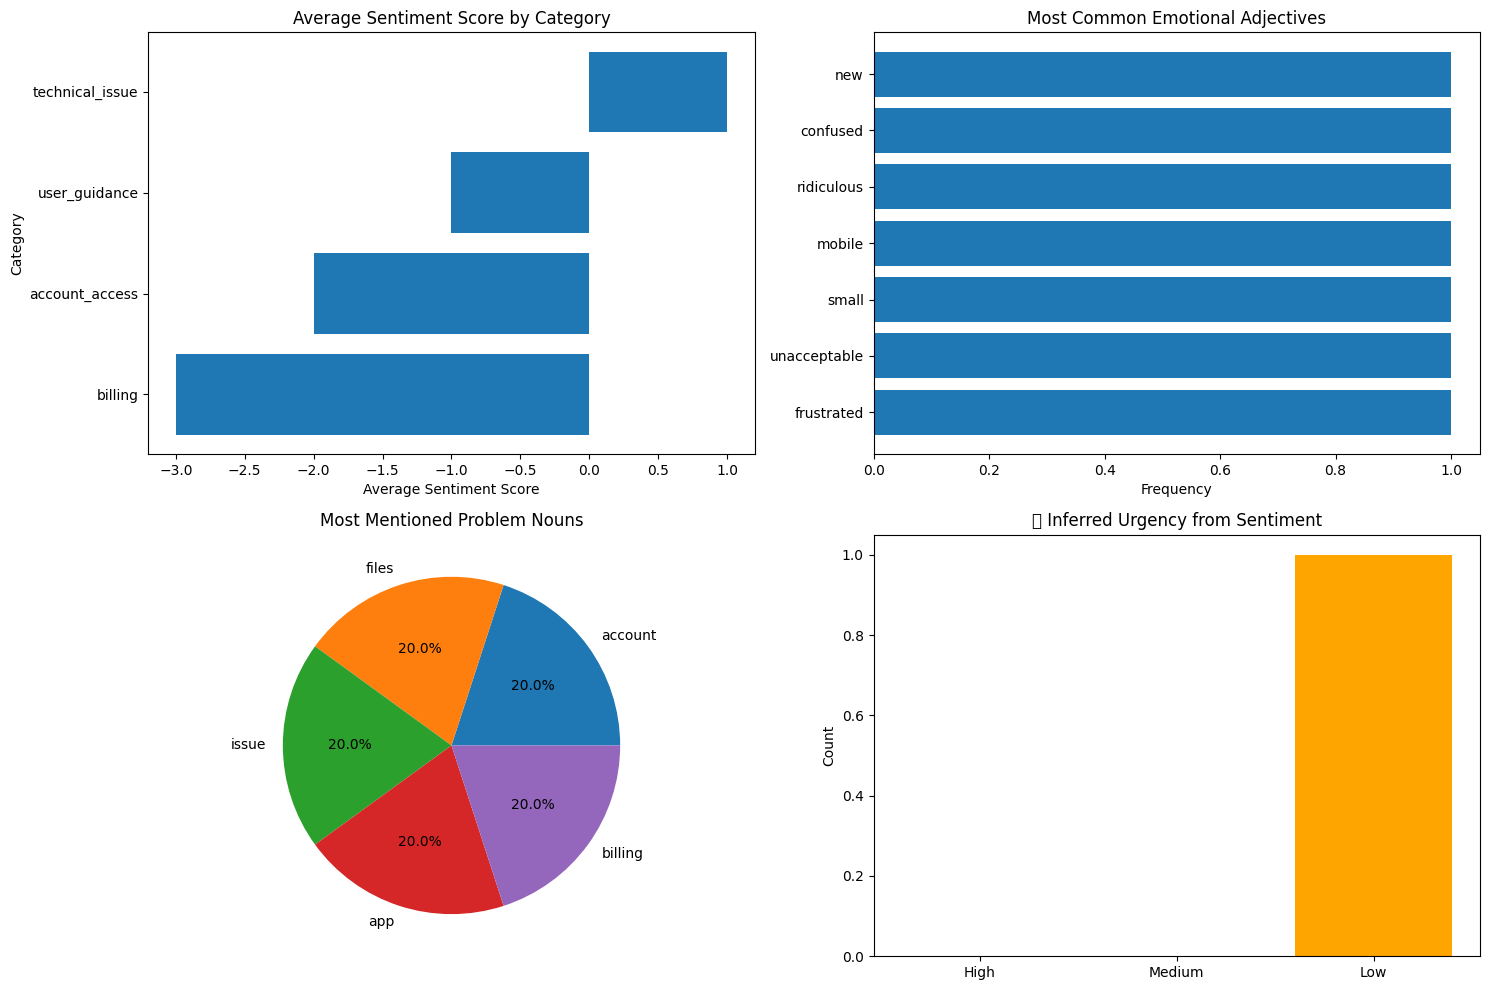

In [36]:

# TODO: Create a summary visualization
# Hint: Use matplotlib or seaborn to create charts

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from collections import Counter

# Convert results to DataFrame for easier analysis

# TODO: Create visualizations
# 1. Sentiment scores by category
# 2. Most common emotional adjectives
# 3. Action verbs frequency
print(df.columns)
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# TODO: Plot 1 - Sentiment by category
category_setiment = df.groupby('category')['sentiment_score'].mean().sort_values()
axes[0,0].barh(category_setiment.index, category_setiment.values)
axes[0,0].set_title('Average Sentiment Score by Category')
axes[0,0].set_xlabel('Average Sentiment Score')
axes[0,0].set_ylabel('Category')

# TODO: Plot 2 - Word frequency analysis
adj_counter = Counter(word for words in df['emotional_adjectives'].dropna() for word in words)
common_adjs = adj_counter.most_common(10)
adj_words, adj_freqs = zip(*common_adjs)
axes[0,1].barh(adj_words, adj_freqs)
axes[0,1].set_title('Most Common Emotional Adjectives')
axes[0,1].set_xlabel('Frequency')

# TODO: Plot 3 - Problem categorization
# Flatten and count problem nouns
problem_counter = Counter(word for words in df['problem_nouns'].dropna() for word in words)
common_problems = problem_counter.most_common(5)
labels, sizes = zip(*common_problems)
axes[1,0].pie(sizes, labels=labels, autopct='%1.1f%%')
axes[1,0].set_title('Most Mentioned Problem Nouns')


# TODO: Plot 4 - Urgency analysis
# Create urgency-like bins based on sentiment
urgency_bins = pd.cut(df['sentiment_score'], bins=[-1.0, -0.25, 0.25, 1.0], labels=['High', 'Medium', 'Low'])
urgency_counts = urgency_bins.value_counts().sort_index()
axes[1,1].bar(urgency_counts.index, urgency_counts.values, color='orange')
axes[1,1].set_title('🕑 Inferred Urgency from Sentiment')
axes[1,1].set_ylabel('Count')


plt.tight_layout()
plt.show()


### 💼 Business Impact Questions:
1. How could this analysis help prioritize customer service tickets? This would give insight into wchich issyes have not only low sentiment but also high urgency this would help focus on critical casses first.
2. What patterns do you notice in different problem categories? If my code is correct the partern seems to be that they all equal to the same percantage.
3. How might you automate the routing of calls based on POS analysis?  by knowing action verbs and problem nouns, the system could tag and direct tickets to certain teams.
4. What are the limitations of this approach? I would say messy grammar and slang could lead to misclassification.



## ⚡ Lab Exercise 3: Tagger Performance Benchmarking (20 minutes)

Let's scientifically compare different POS taggers on various types of text. This will help you understand when to use which tool.



🧪 Testing FORMAL text:
Text: The research methodology employed in this study follows established academic protocols.
------------------------------------------------------------
NLTK Penn time: 0.0017s, Unknown: 0
NLTK Univ time: 0.0004s, Unknown: 0
SpaCy time: 0.0154s, Unknown: 0

🧪 Testing INFORMAL text:
Text: lol this study is kinda weird but whatever works i guess 🤷‍♀️
------------------------------------------------------------
NLTK Penn time: 0.0017s, Unknown: 0
NLTK Univ time: 0.0006s, Unknown: 0
SpaCy time: 0.0099s, Unknown: 0

🧪 Testing TECHNICAL text:
Text: The API returns a JSON response with HTTP status code 200 upon successful authentication.
------------------------------------------------------------
NLTK Penn time: 0.0015s, Unknown: 3
NLTK Univ time: 0.0009s, Unknown: 0
SpaCy time: 0.0112s, Unknown: 0

🧪 Testing CONVERSATIONAL text:
Text: So like, when you click that button thingy, it should totally work, right?
---------------------------------------------------------

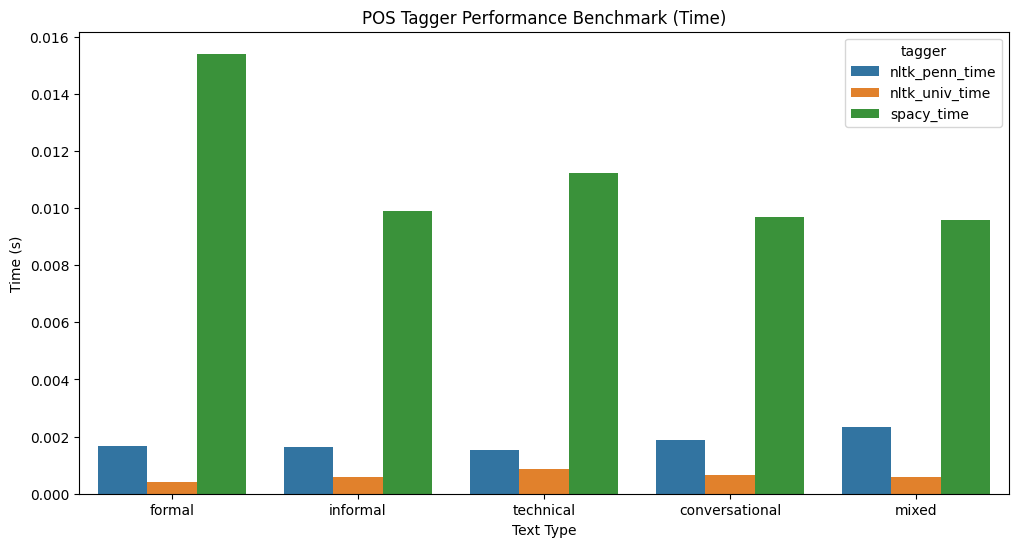

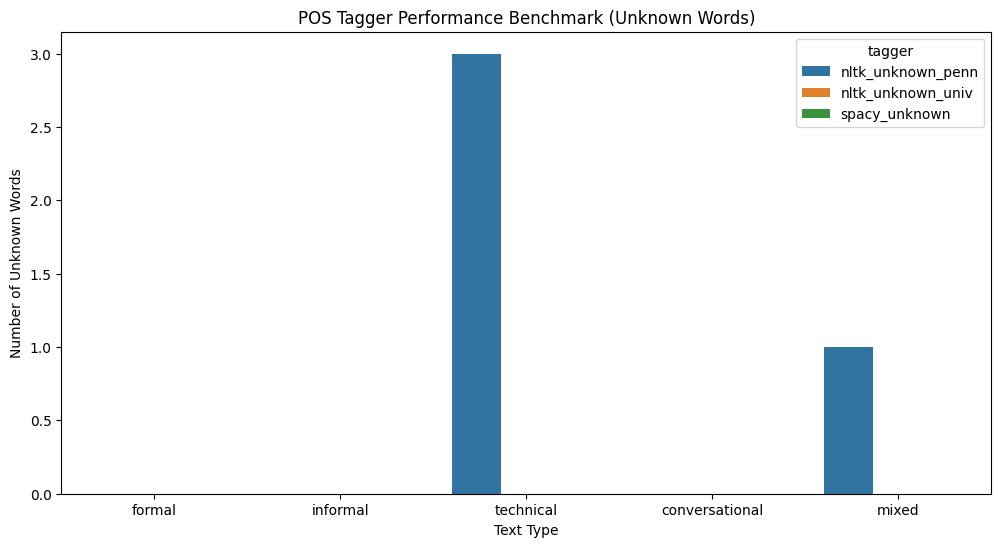

In [38]:
import time
from collections import defaultdict
import nltk
import spacy

# Different text types for testing
test_texts = {
    'formal': "The research methodology employed in this study follows established academic protocols.",
    'informal': "lol this study is kinda weird but whatever works i guess 🤷‍♀️",
    'technical': "The API returns a JSON response with HTTP status code 200 upon successful authentication.",
    'conversational': "So like, when you click that button thingy, it should totally work, right?",
    'mixed': "OMG the algorithm's performance is absolutely terrible! The accuracy dropped to 23% wtf"
}

# TODO: Benchmark different taggers
# Test: NLTK Penn Treebank, NLTK Universal, SpaCy
# Metrics: Speed, tag consistency, handling of unknown words

benchmark_results = defaultdict(list)

# Load SpaCy model if not already loaded
try:
    nlp
except NameError:
    nlp = spacy.load('en_core_web_sm')


for text_type, text in test_texts.items():
    print(f"\n🧪 Testing {text_type.upper()} text:")
    print(f"Text: {text}")
    print("-" * 60)

    # TODO: NLTK Penn Treebank timing
    start_time = time.time()
    nltk_tokens = nltk.word_tokenize(text)
    nltk_penn_tags = nltk.pos_tag(nltk_tokens)
    nltk_penn_time = time.time() - start_time

    # TODO: NLTK Universal timing
    start_time = time.time()
    nltk_univ_tags = nltk.pos_tag(nltk_tokens, tagset='universal')
    nltk_univ_time = time.time() - start_time

    # TODO: SpaCy timing
    start_time = time.time()
    spacy_doc = nlp(text)
    spacy_time = time.time() - start_time

    # TODO: Count unknown/problematic tags
    nltk_unknown_penn = [word for word, tag in nltk_penn_tags if tag in ['NNP', 'NNPS', 'POS', 'SYM', 'LS', 'FW', 'UNK', 'X']]
    nltk_unknown_univ = [word for word, tag in nltk_univ_tags if tag == 'X']
    spacy_unknown = [token.text for token in spacy_doc if token.pos_ == 'X']


    # Store results
    benchmark_results[text_type] = {
        'nltk_penn_time': nltk_penn_time,
        'nltk_univ_time': nltk_univ_time,
        'spacy_time': spacy_time,
        'nltk_unknown_penn': len(nltk_unknown_penn),
        'nltk_unknown_univ': len(nltk_unknown_univ),
        'spacy_unknown': len(spacy_unknown)
    }

    print(f"NLTK Penn time: {nltk_penn_time:.4f}s, Unknown: {len(nltk_unknown_penn)}")
    print(f"NLTK Univ time: {nltk_univ_time:.4f}s, Unknown: {len(nltk_unknown_univ)}")
    print(f"SpaCy time: {spacy_time:.4f}s, Unknown: {len(spacy_unknown)}")

# TODO: Create performance comparison visualization
# Convert benchmark results to a DataFrame for easier plotting
benchmark_df = pd.DataFrame.from_dict(benchmark_results, orient='index')
benchmark_df = benchmark_df.reset_index().rename(columns={'index': 'text_type'})

# Melt the DataFrame for easier plotting of times
time_df = benchmark_df.melt(id_vars='text_type', value_vars=['nltk_penn_time', 'nltk_univ_time', 'spacy_time'], var_name='tagger', value_name='time')

# Melt the DataFrame for easier plotting of unknown counts
unknown_df = benchmark_df.melt(id_vars='text_type', value_vars=['nltk_unknown_penn', 'nltk_unknown_univ', 'spacy_unknown'], var_name='tagger', value_name='unknown_count')


plt.figure(figsize=(12, 6))
sns.barplot(x='text_type', y='time', hue='tagger', data=time_df)
plt.title('POS Tagger Performance Benchmark (Time)')
plt.ylabel('Time (s)')
plt.xlabel('Text Type')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='text_type', y='unknown_count', hue='tagger', data=unknown_df)
plt.title('POS Tagger Performance Benchmark (Unknown Words)')
plt.ylabel('Number of Unknown Words')
plt.xlabel('Text Type')
plt.show()


### 📊 Performance Analysis:
1. Which tagger is fastest? Does speed matter for your use case? The fastest tagger is NLTK with Universal tag and i would say it onyl matters if i were to be tagging A LOT of texts.
2. Which handles informal text best? I would say SpaCY handles informal text the best.
3. How do the taggers compare on technical jargon? SpaCy is much better than NLTK  because it recognized terms like "API"
4. What trade-offs do you see between speed and accuracy?
I would say slow = more accurate (SpaCy) while fast = less accurate (NLTK)


## 🚨 Lab Exercise 4: Edge Cases and Error Analysis (15 minutes)

Every system has limitations. Let's explore the edge cases where POS taggers struggle and understand why.


In [43]:
# Challenging edge cases
edge_cases = [
    "Buffalo buffalo Buffalo buffalo buffalo buffalo Buffalo buffalo.",  # Famous ambiguous sentence
    "Time flies like an arrow; fruit flies like a banana.",              # Classic ambiguity
    "The man the boat the river.",                                       # Garden path sentence
    "Police police Police police police police Police police.",          # Recursive structure
    "James while John had had had had had had had had had had had a better effect on the teacher.",  # Had had had...
    "Can can can can can can can can can can.",                         # Modal/noun ambiguity
    "@username #hashtag http://bit.ly/abc123 😂🔥💯",                   # Social media elements
    "COVID-19 AI/ML IoT APIs RESTful microservices",                    # Modern technical terms
]

print("🚨 EDGE CASE ANALYSIS")
print("=" * 50)

# TODO: Process each edge case and analyze failures
for i, text in enumerate(edge_cases, 1):
    print(f"\n🔍 Edge Case {i}:")
    print(f"Text: {text}")
    print("-" * 30)

    try:
        # TODO: Process with both taggers
        nltk_tokens = nltk.word_tokenize(text)
        nltk_tags = nltk.pos_tag(nltk_tokens)
        spacy_doc = nlp(text)

        # TODO: Identify potential errors or weird tags
        # Look for: repeated tags, unusual patterns, X tags, etc.

        print("NLTK tags:", [(w, t) for w, t in nltk_tags])
        print("SpaCy tags:", [(token.text, token.pos_) for token in spacy_doc])

        # TODO: Analyze what went wrong
        # Print any tokens with 'X' tag in SpaCy as potential issues
        spacy_unknown_tokens = [(token.text, token.pos_) for token in spacy_doc if token.pos_ == 'X']
        if spacy_unknown_tokens:
            print(f"  SpaCy potential issues (tagged 'X'): {spacy_unknown_tokens}")

        # You could add more complex analysis here, e.g., checking for unexpected tag sequences

    except Exception as e:
        print(f"❌ Error processing: {e}")

# TODO: Reflection on limitations
print("\n🤔 REFLECTION ON LIMITATIONS:")
print("=" * 40)
print("1 Repetitive word order (like 'Buffalo buffalo...') makes it hard for taggers to pick the correct tags.")
print("2 Sentences with multiple meanings can trick taggers into giving the wrong part of speech.")
print("3 Weird sentence structures like 'The man the boat the river' confuse the tagger because they don’t follow grammar normally.")
print("4 Repeating the same word over and over, like 'Police police...', makes it hard to tell what each word is doing.")
print("5 Weird grammar (like 'James had had had...') throws off tagging because it looks wrong even when it's correct.")
print("6 Words repeated over and over (like 'can can can...') challenge the taggers' ability to track structure.")
print("7 Emojis, hashtags, and URLs confuse taggers that weren’t trained purposely for social media text.")
print("8 Modern terms like 'AI/ML' often get split or tagged in weird and confusing ways.")


🚨 EDGE CASE ANALYSIS

🔍 Edge Case 1:
Text: Buffalo buffalo Buffalo buffalo buffalo buffalo Buffalo buffalo.
------------------------------
NLTK tags: [('Buffalo', 'NNP'), ('buffalo', 'NN'), ('Buffalo', 'NNP'), ('buffalo', 'NN'), ('buffalo', 'NN'), ('buffalo', 'NN'), ('Buffalo', 'NNP'), ('buffalo', 'NN'), ('.', '.')]
SpaCy tags: [('Buffalo', 'PROPN'), ('buffalo', 'NOUN'), ('Buffalo', 'PROPN'), ('buffalo', 'PROPN'), ('buffalo', 'PROPN'), ('buffalo', 'PROPN'), ('Buffalo', 'PROPN'), ('buffalo', 'PROPN'), ('.', 'PUNCT')]

🔍 Edge Case 2:
Text: Time flies like an arrow; fruit flies like a banana.
------------------------------
NLTK tags: [('Time', 'NNP'), ('flies', 'NNS'), ('like', 'IN'), ('an', 'DT'), ('arrow', 'NN'), (';', ':'), ('fruit', 'CC'), ('flies', 'NNS'), ('like', 'IN'), ('a', 'DT'), ('banana', 'NN'), ('.', '.')]
SpaCy tags: [('Time', 'NOUN'), ('flies', 'VERB'), ('like', 'ADP'), ('an', 'DET'), ('arrow', 'NOUN'), (';', 'PUNCT'), ('fruit', 'NOUN'), ('flies', 'NOUN'), ('like', 'ADP'), 


### 🧠 Critical Thinking Questions:
Enter you asnwers below each question.
1. Why do these edge cases break the taggers?
Its because the sentences are unusual and repetitive and most taggers rely on typical grammar patterns to make their decisions.
2. How might you preprocess text to handle some of these issues? As menioned before i could expand slag as in expain it directly.

3. When would these limitations matter in real applications?
They would matter in real applications such as social media considering that text is never grammatically correct in social media.
4. How do modern large language models handle these cases differently? I would say they understand broader text and meaning being able to tag weird sentences.

---



## 🎯 Final Reflection and Submission

Congratulations! You've completed a comprehensive exploration of POS tagging, from basic concepts to real-world challenges.

### 📝 Reflection Questions (Answer in the cell below):

1. **Tool Comparison**: Based on your experience, when would you choose NLTK vs SpaCy? Consider factors like ease of use, accuracy, speed, and application type.

2. **Real-World Applications**: Describe a specific business problem where POS tagging would be valuable. How would you implement it?

3. **Limitations and Solutions**: What are the biggest limitations you discovered? How might you work around them?

4. **Future Learning**: What aspects of POS tagging would you like to explore further? (Neural approaches, custom training, domain adaptation, etc.)

5. **Integration**: How does POS tagging fit into larger NLP pipelines? What other NLP tasks might benefit from POS information?



### ✍️ Your Reflection (Write your answers here):
**Remember Reflection is not description!**

**1. Tool Comparison:**
I would use SpaCy for situations where text has lots of slang but NLTK when speed is a priority and not accuracy.

**2. Real-World Applications:**
I would say a specific business problem where POS would be valubable would be like in a company chatbot which would be able to understand what customers are talking about such as issues with their order and redirect them to a proper department.
**3. Limitations and Solutions:**
I would say the biggsest limitation is the undestanding of slang or sarcasm but for the most i could work around slang by explaining what it means in the code.

**4. Future Learning:**
I would like to explore custom training a bit further.

**5. Integration:**
POS fits into NLP pipelines by helping the system understand what each word is doing. POS helps other NLP tasks such as summarizing or translation.



---

## 📤 Submission Checklist

Before submitting your completed notebook, make sure you have:

- [ ] ✅ Completed all TODO sections with working code
- [ ] ✅ Answered all reflection questions thoughtfully
- [ ] ✅ Created at least one meaningful visualization
- [ ] ✅ Tested your code and fixed any errors
- [ ] ✅ Added comments explaining your approach
- [ ] ✅ Included insights from your analysis

### 📋 Submission Instructions:
1. **Save your notebook**: File → Save (or Ctrl+S)
2. **Download**: File → Download → Download .ipynb
3. **Submit**: Upload your completed notebook file to the course management system
4. **Filename**: Use format: `L05_LastName_FirstName_ITAI2373.ipynb or pdf`  

### 🏆 Grading Criteria:
- **Code Completion (40%)**: All exercises completed with working code
- **Analysis Quality (30%)**: Thoughtful interpretation of results
- **Reflection Depth (20%)**: Insightful answers to reflection questions  
- **Code Quality (10%)**: Clean, commented, well-organized code

---

## 🎉 Great Work!

You've successfully explored the fascinating world of POS tagging! You now understand how computers parse human language and can apply these techniques to solve real-world problems.


Keep exploring and happy coding! 🚀
